In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'all_year2.csv'
data = pd.read_csv(file_path)

In [46]:
data = data[data['Year']==2022]

In [47]:
# Convert market share to numeric values (removing % sign)
data['MarketShare'] = data['MarketShare'].str.replace('%', '').astype(float)

/tmp/ipykernel_3563/61829075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MarketShare'] = data['MarketShare'].str.replace('%', '').astype(float)


In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df_long = data.melt(
    id_vars=['Year', 'Maker', 'Total', 'MarketShare'],
    var_name='Month',
    value_name='Sales'
)

In [10]:
df_long.to_csv('all_year2_melted.csv')

In [22]:
sales_summary = df_long.groupby(['Year', 'Month'], as_index=False).agg({'Sales': 'sum'})


In [32]:
df2 = pd.read_csv('headlines_sentiment.csv')

In [56]:
headlines_summary = df2.groupby(['year','month'],as_index=False).agg({'Polarity':'sum', 'Positive_score':'sum'})

In [85]:
df_merged = pd.merge(
    sales_summary,
    headlines_summary,
    left_on=['Year', 'Month'],
    right_on=['year', 'month'],
    how='inner'
)
df_merged.to_csv('grouped_csv_for_correlation.csv')

In [86]:
df['Month'] = pd.Categorical(df['Month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], ordered=True)
df_sorted = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# Calculate percentage change in sales from the previous month
df_sorted['Sales_Percent_Change'] = df_sorted['Sales'].pct_change() * 100

In [88]:
df_sorted

,Year,Month,Sales,year,month,Polarity,Positive_score,Sales_Percent_Change
0,2019,Jul,1568.0,2019,Jul,0.000000,0.000,NaN
1,2019,Aug,1507.0,2019,Aug,1.733586,1.668,-3.890306
2,2019,Oct,2136.0,2019,Oct,-0.150000,0.872,41.738553
3,2020,Jan,5319.0,2020,Jan,0.000000,0.145,149.016854
4,2020,Mar,11970.0,2020,Mar,-0.284596,0.999,125.042301
5,2020,Apr,85.0,2020,Apr,0.568182,0.650,-99.289891
6,2020,May,558.0,2020,May,2.058333,1.151,556.470588
7,2020,Jun,1511.0,2020,Jun,0.347619,0.891,170.788530
8,2020,Jul,1488.0,2020,Jul,1.110444,2.552,-1.522171
9,2020,Aug,2115.0,2020,Aug,0.400000,0.567,42.137097


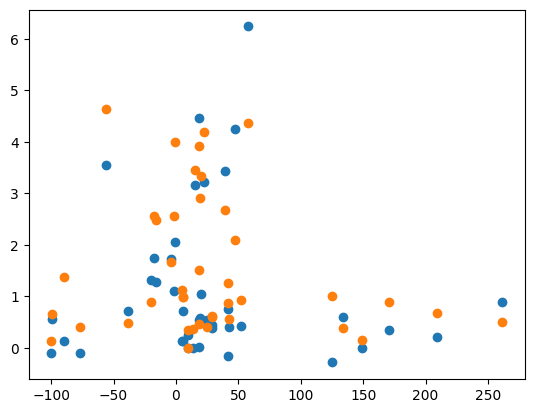

In [92]:
plt.scatter(df_sorted['Sales_Percent_Change'], df_sorted['Polarity'])
plt.scatter(df_sorted['Sales_Percent_Change'], df_sorted['Positive_score'])


In [95]:
df_sorted = df_sorted[df_sorted['Sales_Percent_Change']<100]

In [96]:
correlation_matrix = df_sorted[['Sales_Percent_Change', 'Polarity', 'Positive_score']].corr()

# Display the correlation matrix
print(correlation_matrix)

                      Sales_Percent_Change  Polarity  Positive_score
Sales_Percent_Change              1.000000  0.268716        0.162257
Polarity                          0.268716  1.000000        0.794334
Positive_score                    0.162257  0.794334        1.000000


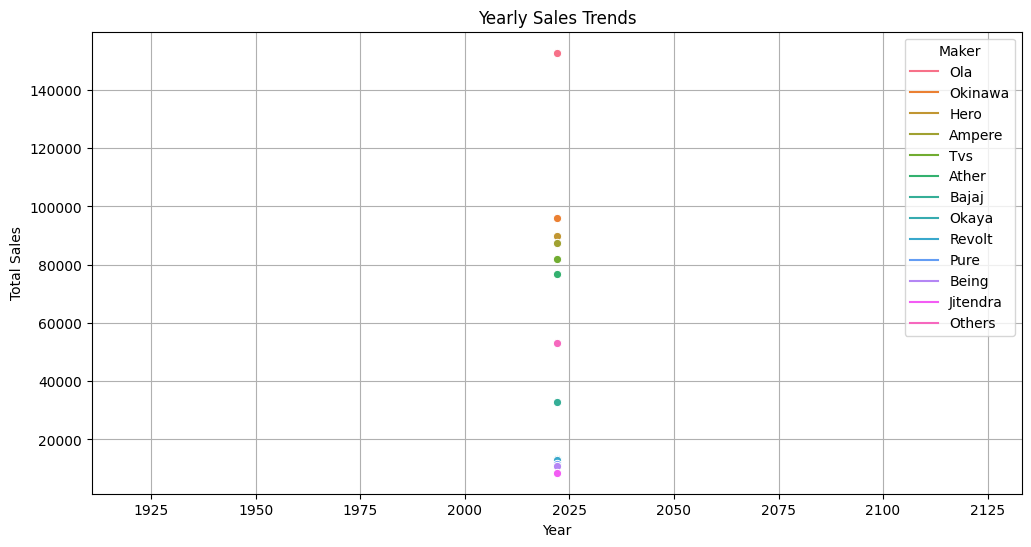

In [48]:
# Yearly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Total', hue='Maker', marker='o')
plt.title('Yearly Sales Trends')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Maker')
plt.show()

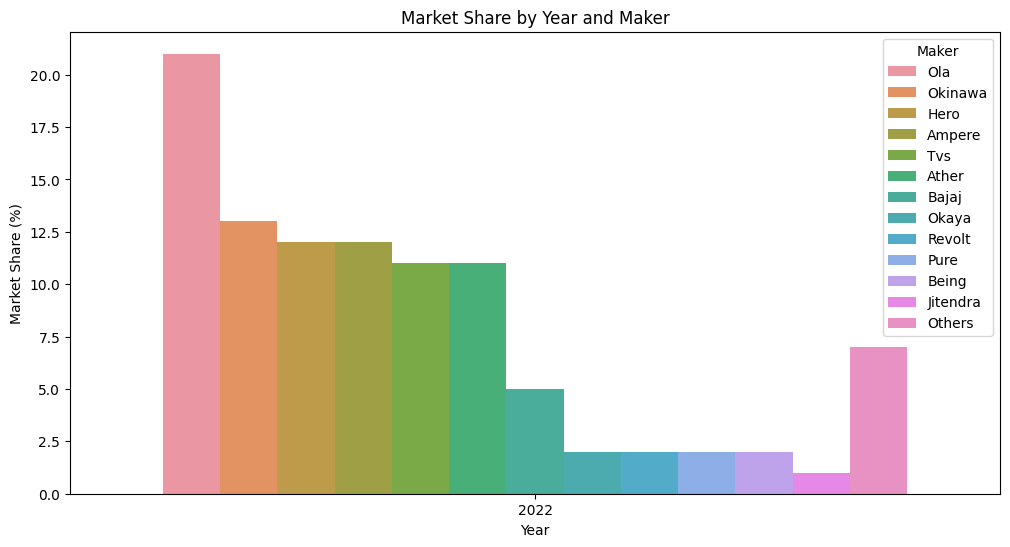

In [49]:
# Market Share Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Year', y='MarketShare', hue='Maker')
plt.title('Market Share by Year and Maker')
plt.ylabel('Market Share (%)')
plt.xlabel('Year')
plt.legend(title='Maker')
plt.show()

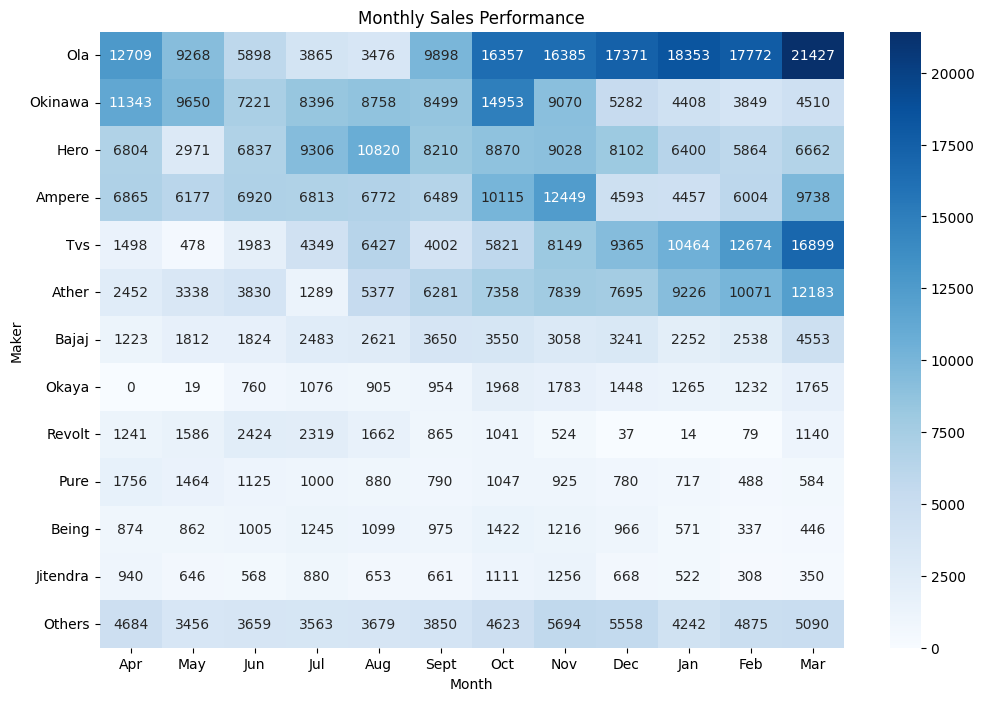

In [50]:
# Monthly Sales Performance - Heatmap
monthly_data = data[['Maker', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']]
monthly_data = monthly_data.set_index('Maker')
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_data, cmap='Blues', annot=True, fmt='g')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Maker')
plt.show()

In [54]:
# Convert month columns into a long format
monthly_data_long = pd.melt(
    data,
    id_vars=['Maker'],
    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
    var_name='Month',
    value_name='Sales'
)

# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
monthly_data_long['Month'] = pd.Categorical(monthly_data_long['Month'], categories=month_order, ordered=True)

# Group by Maker and Month to sum sales
monthly_sales_grouped = monthly_data_long.groupby(['Maker', 'Month']).sum().reset_index()

# Pivot the table for heatmap
monthly_sales_pivot = monthly_sales_grouped.pivot(index='Maker', columns='Month', values='Sales').pct_change(axis=1)*100

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.lineplot(monthly_sales_pivot,x='Month')
plt.title('Monthly Sales Performance by Maker')
plt.xlabel('Month')
plt.ylabel('Maker')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `Month` for parameter `x`

<Figure size 1200x800 with 0 Axes>

In [42]:
import pandas as pd


df = data

# Filter the data for Ola
ola_data = df[df['Maker'] == 'Ola']

# Calculate the year-wise percentage change in monthly sales
ola_data_percentage_change = ola_data.loc[:, 'Apr':'Mar'].pct_change(axis=1) * 100

# Add the year back for reference
ola_data_percentage_change['Year'] = ola_data['Year'].values

# Display the result
ola_data_percentage_change.set_index('Year', inplace=True)
ola_data_percentage_change


,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Year,,,,,,,,,,,,
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,361.250000,253.387534,133.793456
2022,NaN,-27.075301,-36.361675,-34.469312,-10.064683,184.752589,65.255607,0.171181,6.017699,5.653100,-3.165695,20.566059
2023,NaN,30.238354,-38.457256,9.695839,-3.396382,-0.213402,27.534217,25.647690,1.274523,6.437372,-100.000000,NaN


In [43]:
df = data

# Filter the data for Ola
ola_data = df[df['Maker'] == 'Ather']

# Calculate the year-wise percentage change in monthly sales
ola_data_percentage_change = ola_data.loc[:, 'Apr':'Mar'].pct_change(axis=1) * 100

# Add the year back for reference
ola_data_percentage_change['Year'] = ola_data['Year'].values

# Display the result
ola_data_percentage_change.set_index('Year', inplace=True)
ola_data_percentage_change

,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Year,,,,,,,,,,,,
2019,NaN,282.142857,333.644860,-35.344828,-39.000000,-47.540984,45.833333,155.714286,-21.229050,0.709220,29.929577,-20.325203
2020,NaN,inf,9.790210,-8.280255,68.750000,9.053498,-2.641509,39.534884,48.611111,13.271028,3.300330,69.968051
2021,NaN,-82.281285,100.000000,462.187500,-10.339077,34.841909,21.747126,-16.805136,-17.703132,3.750689,18.713450,0.000000
2022,NaN,36.133768,14.739365,-66.344648,317.145074,16.812349,17.146951,6.537102,-1.836969,19.896036,9.158899,20.971105
2023,NaN,97.769803,-70.168503,45.231371,6.970830,0.559362,17.786122,10.106257,-29.809136,42.422854,-100.000000,NaN


In [23]:

sns.heatmap(monthly_sales_pivot.pct_change(axis=1)*100

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
Maker,,,,,,,,,,,,
Ampere,NaN,-12.320765,51.561824,-5.828956,4.643831,-39.030184,7.259597,2.675408,3.252804,39.567143,19.817986,-36.393164
Ather,NaN,-37.621951,18.610422,-29.092177,71.461779,-51.121076,8.992959,42.576099,9.892222,17.903548,6.421532,-16.006173
Bajaj,NaN,-70.925524,38.124845,-3.420958,122.949292,-57.538256,45.234344,36.962712,12.533413,19.600598,17.329901,-9.221992
Battre,NaN,-100.000000,NaN,inf,83.895706,-93.077565,62.650602,115.555556,-11.340206,-10.852713,190.000000,-63.418291
Being,NaN,-3.372029,-6.750572,-35.889571,-10.143541,31.629393,44.012945,-16.966292,-4.330176,38.967468,12.926209,2.748986
Bgauss,NaN,-100.000000,NaN,inf,135.278859,-89.470783,246.073298,39.636914,1.300108,25.240642,37.233134,-24.331052
Hero,NaN,-4.322302,64.605390,-53.548458,-53.536307,73.890958,49.347614,17.407745,-5.297645,0.381142,13.248437,-11.172435
Jitendra,NaN,-7.221207,48.078818,-35.063207,-32.377049,-6.363636,79.126214,-21.047877,-0.343249,73.938002,4.620462,-20.567823
Kinetic,NaN,-100.000000,NaN,inf,5.778302,-77.369008,14.285714,65.948276,-39.220779,68.376068,8.375635,56.440281


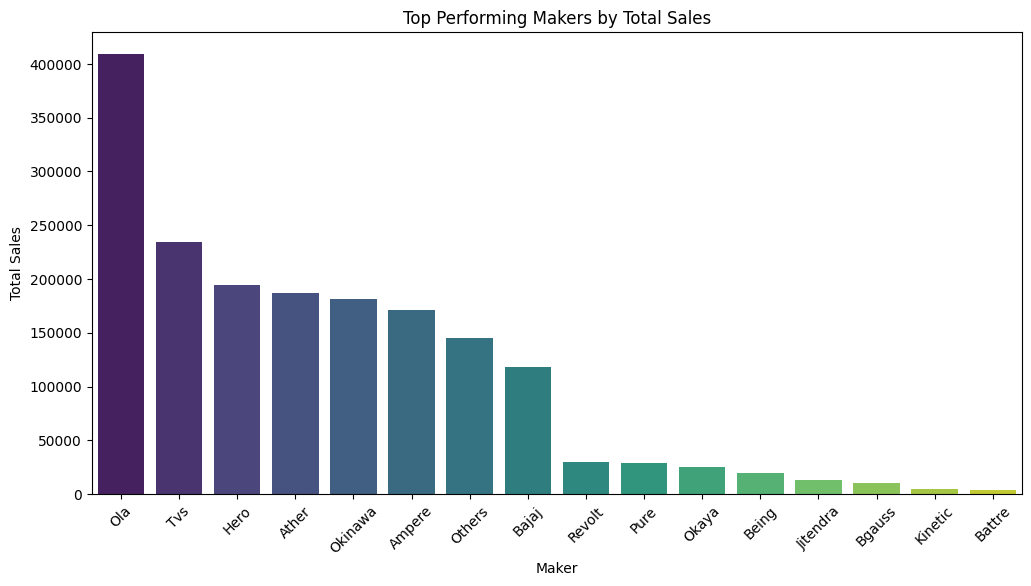

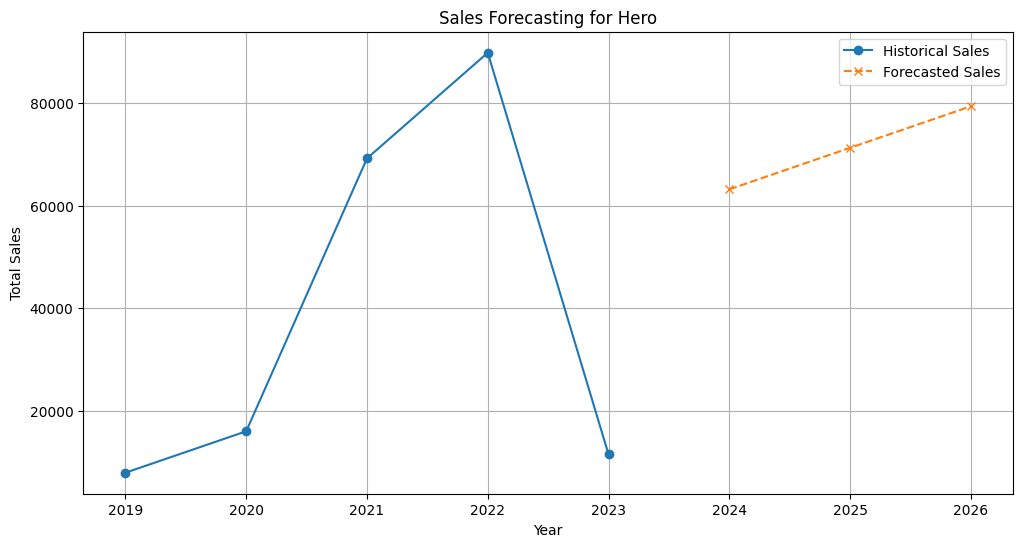

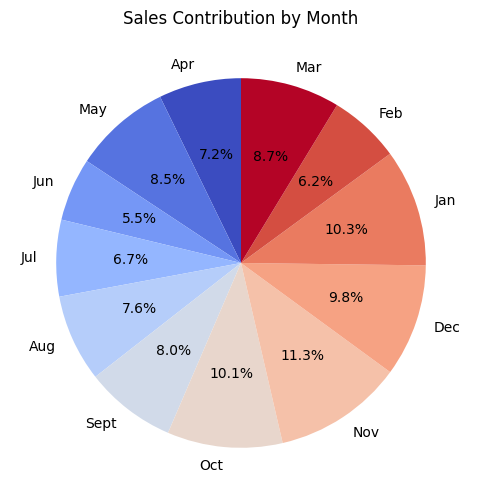

       Maker  Total Sales  Average Sales  Sales Std Dev  Average Market Share
0     Ampere       170822   34164.400000   35094.425245             10.400000
1      Ather       186753   37350.600000   39312.933734             10.200000
2      Bajaj       118675   29668.750000   34550.083506              5.500000
3     Battre         4047    4047.000000            NaN              1.000000
4      Being        19543    6514.333333    4989.357908              2.666667
5     Bgauss        10776   10776.000000            NaN              1.000000
6       Hero       194377   38875.400000   37953.337947             21.200000
7   Jitendra        13077    4359.000000    3984.110440              1.333333
8    Kinetic         5108    5108.000000            NaN              1.000000
9      Okaya        25321   12660.500000     727.612878              2.000000
10   Okinawa       181070   36214.000000   37038.567123             18.000000
11       Ola       409020  136340.000000  114603.208860         

In [8]:
# Top Performing Makers
top_makers = data.groupby('Maker')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_makers, x='Maker', y='Total', palette='viridis')
plt.title('Top Performing Makers by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Maker')
plt.xticks(rotation=45)
plt.show()

# Sales Forecasting (Simple Linear Projection)
from sklearn.linear_model import LinearRegression
import numpy as np

# Forecasting future sales for the first maker
maker_data = data[data['Maker'] == 'Hero']
X = maker_data['Year'].values.reshape(-1, 1)
y = maker_data['Total'].values
model = LinearRegression()
model.fit(X, y)

future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
forecasted_sales = model.predict(future_years)

plt.figure(figsize=(12, 6))
plt.plot(maker_data['Year'], maker_data['Total'], label='Historical Sales', marker='o')
plt.plot(future_years, forecasted_sales, label='Forecasted Sales', linestyle='--', marker='x')
plt.title('Sales Forecasting for Hero')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

# Sales Contribution by Month
monthly_sales = data[['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Sales Contribution by Month')
plt.ylabel('')
plt.show()

# Performance Metrics
performance_metrics = data.groupby('Maker').agg({
    'Total': ['sum', 'mean', 'std'],
    'MarketShare': ['mean']
}).reset_index()
performance_metrics.columns = ['Maker', 'Total Sales', 'Average Sales', 'Sales Std Dev', 'Average Market Share']
print(performance_metrics)

# Interactive Filtering and Drill-down (using ipywidgets for Jupyter Notebook)
# Uncomment and run the following code in a Jupyter Notebook environment
# import ipywidgets as widgets
# from IPython.display import display

# def plot_sales_by_maker(maker):
#     filtered_data = data[data['Maker'] == maker]
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(data=filtered_data, x='Year', y='Total', marker='o')
#     plt.title(f'Sales Trend for {maker}')
#     plt.xlabel('Year')
#     plt.ylabel('Total Sales')
#     plt.grid(True)
#     plt.show()

# maker_selector = widgets.Dropdown(
#     options=data['Maker'].unique(),
#     description='Select Maker:',
#     value=data['Maker'].unique()[0],
# )

# widgets.interact(plot_sales_by_maker, maker=maker_selector)